C:\Users\A C E R\AppData\Local\Temp\ipykernel_1096\378296776.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("aldi.jpg")


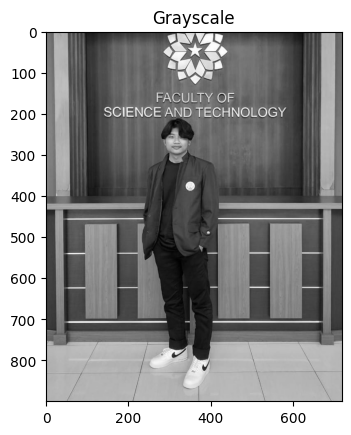

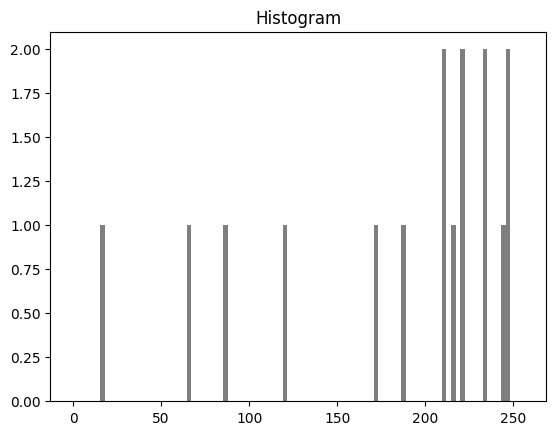

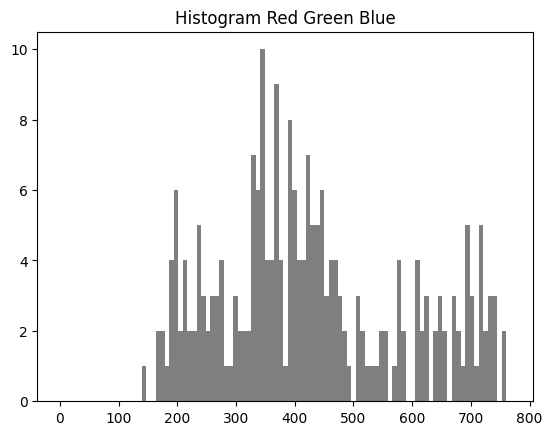

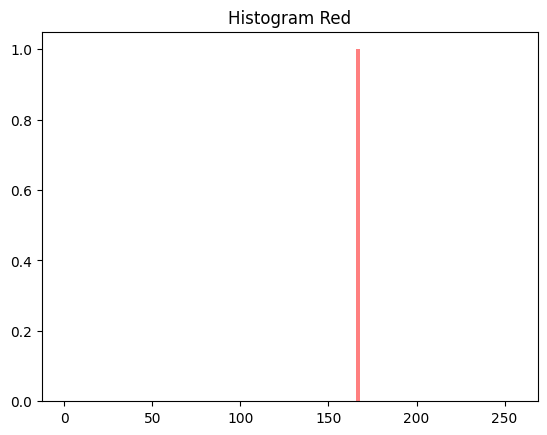

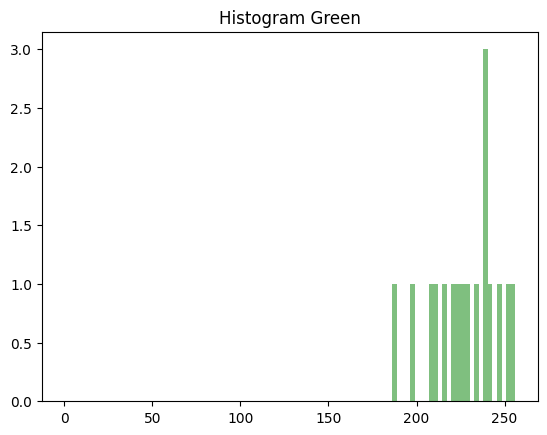

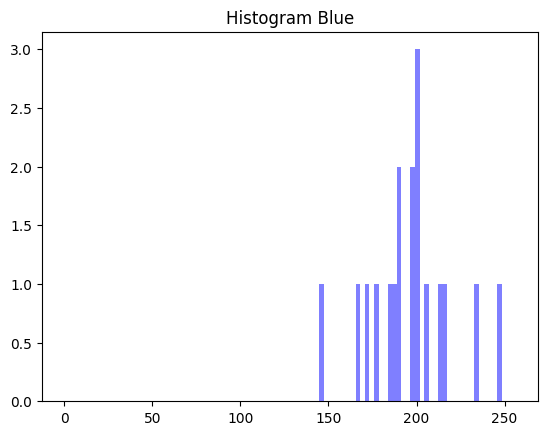

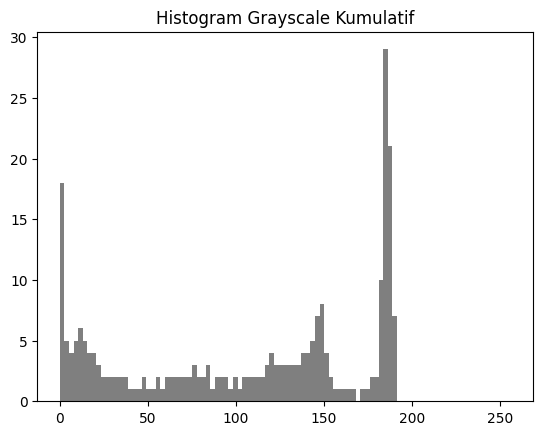

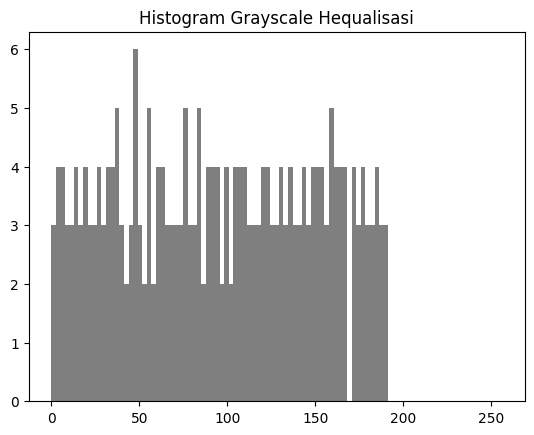

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
img = imageio.imread("aldi.jpg")
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]
img_grayscale = np.zeros(img.shape, dtype=np.uint8)

for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        gray = (int(red) + int(green) + int(blue)) / 3
        img_grayscale[y][x] = (gray, gray, gray)
        
plt.imshow(img_grayscale)
plt.title("Grayscale")
plt.show()
hg = np.zeros((256))
for x in range(0, 256):
    hg[x] = 0
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hg[gray] += 1
# plt.figure(figsize=(20, 6))
# plt.plot(hg, color="black", linewidth=2.0)
# plt.show()

bins = np.linspace(0, 256, 100)
plt.hist(hg, bins, color="black", alpha=0.5)
plt.title("Histogram")
plt.show()
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768))
for x in range(0, 256):
    hgr[x] = 0
    hgg[x] = 0
    hgb[x] = 0
    
for x in range(0, 768):
    hgrgb[x] = 0

# th = int(256/64)
temp = [0]
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2])
        green = green + 256
        blue = blue + 512
#         temp.append(green)
        hgrgb[red] += 1
        hgrgb[green] += 1
        hgrgb[blue] += 1

binsrgb = np.linspace(0, 768, 100)
plt.hist(hgrgb, binsrgb, color="black", alpha=0.5)
# plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")
plt.show()
for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1

bins = np.linspace(0, 256, 100)
plt.hist(hgr, bins, color="red", alpha=0.5)
plt.title("Histogram Red")
plt.show()

plt.hist(hgg, bins, color="green", alpha=0.5)
plt.title("Histogram Green")
plt.show()

plt.hist(hgb, bins, color="blue", alpha=0.5)
plt.title("Histogram Blue")
plt.show()
hgk = np.zeros((256))
c = np.zeros((256))

for x in range(0, 256):
    hgk[x] = 0
    c[x] = 0

for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgk[gray] += 1
                
c[0] = hgk[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgk[x]

hmaxk = c[255]

for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Kumulatif")
plt.show()
hgh = np.zeros((256))
h = np.zeros((256))
c = np.zeros((256))

for x in range(0, 256):
    hgh[x] = 0
    h[x] = 0
    c[x] = 0

for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgh[gray] += 1
                
h[0] = hgh[0]
for x in range(1, 256):
     h[x] = h[x-1] + hgh[x]

for x in range(0, 256):
     h[x] = h[x] / img_height / img_width

for x in range(0, 256):
    hgh[x] = 0
    
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        gray = h[gray] * 255
        hgh[int(gray)] += 1

c[0] = hgh[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgh[x]

hmaxk = c[255]

for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Hequalisasi")
plt.show()
